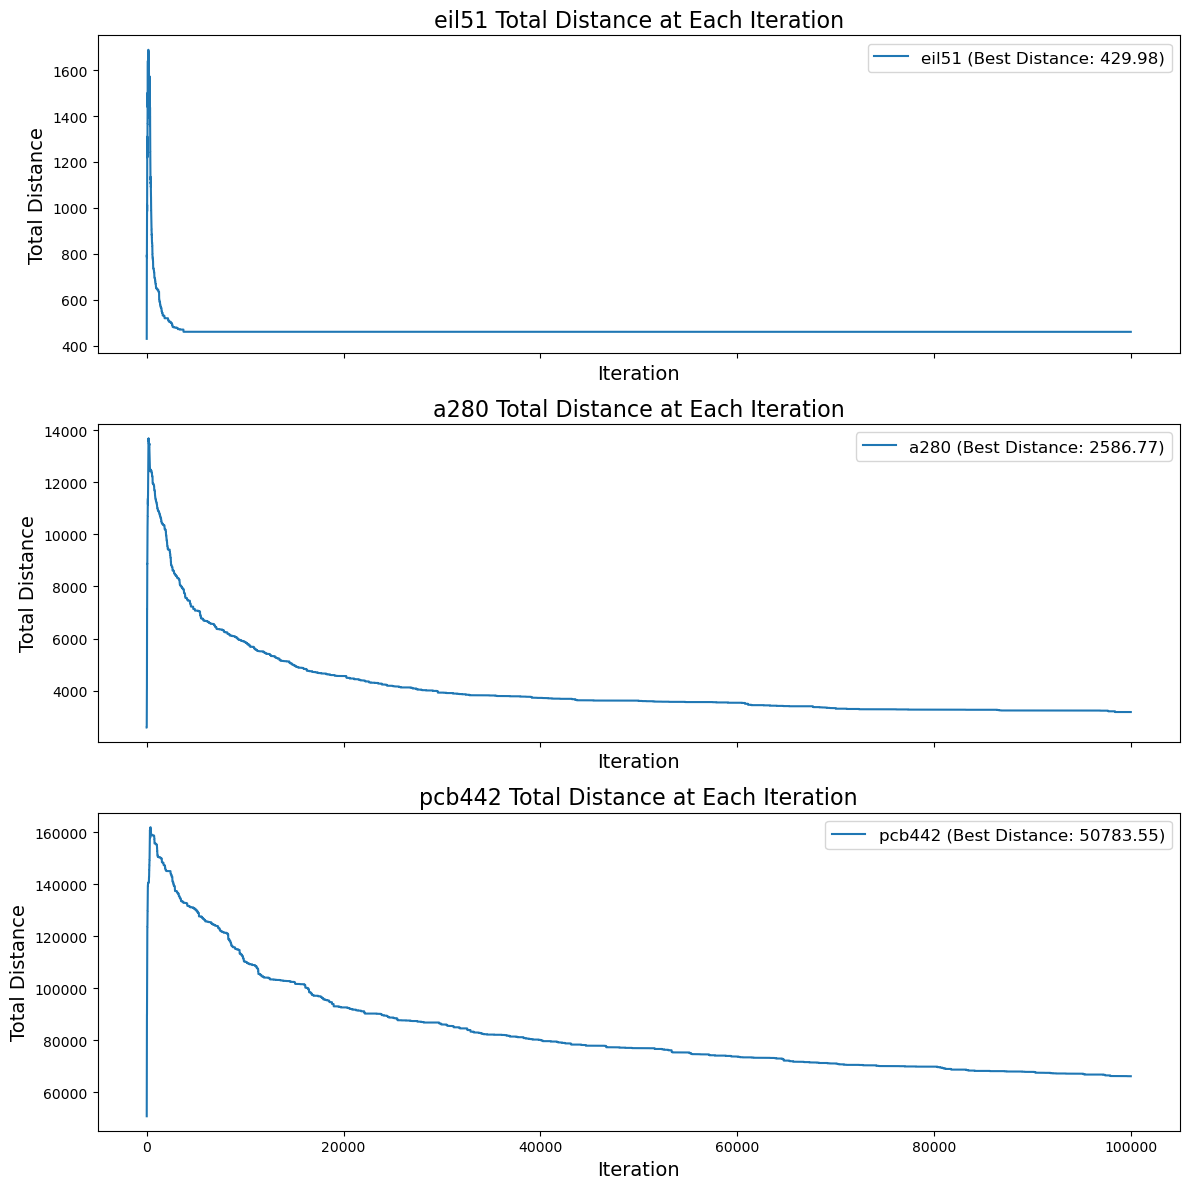

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import random
import math
import re

# Functions to read TSP and tour data
def read_tsp_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    coordinates = {}
    for line in lines:
        if line.startswith('NODE_COORD_SECTION'):
            break
    for line in lines[lines.index('NODE_COORD_SECTION') + 1:]:
        if line.strip() == 'EOF':
            break
        parts = line.split()
        coordinates[int(parts[0])] = (float(parts[1]), float(parts[2]))
    return coordinates

def read_tour_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    tour = []
    for line in lines:
        if line.startswith('TOUR_SECTION'):
            break
    for line in lines[lines.index('TOUR_SECTION') + 1:]:
        if line.strip() == '-1' or re.match(r'EOF', line.strip()):
            break
        tour.append(int(line.strip()))
    return tour

# Euclidean distance calculation
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Total distance calculation for a tour
def calculate_total_distance(tour, coordinates):
    total_distance = 0
    for i in range(-1, len(tour) - 1):
        total_distance += euclidean_distance(coordinates[tour[i]], coordinates[tour[i + 1]])
    return total_distance

# 2-opt swap function
def two_opt(route, i, k):
    new_route = route[:i] + route[i:k+1][::-1] + route[k+1:]
    return new_route

# Stochastic annealing with 2-opt
def stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations):
    current_route = initial_route
    best_route = initial_route[:]
    current_distance = calculate_total_distance(current_route, coordinates)
    best_distance = current_distance
    temperature = max([euclidean_distance(coordinates[i], coordinates[j]) 
                       for i in coordinates for j in coordinates])

    distances = [current_distance]

    for iteration in range(number_of_iterations):
        i, k = sorted(random.sample(range(1, len(current_route) - 1), 2))
        new_route = two_opt(current_route, i, k)
        new_distance = calculate_total_distance(new_route, coordinates)

        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_route = new_route
            current_distance = new_distance

            if new_distance < best_distance:
                best_route = new_route
                best_distance = new_distance

        distances.append(current_distance)
        temperature *= cooling_rate * np.random.normal(1, 0.1)

        # Periodic temperature Boost 
        if iteration % 100 == 0:
            temperature *= 1.1

    return best_route, best_distance, distances

# TSP file names
tsp_files = ['eil51.tsp.txt', 'a280.tsp.txt', 'pcb442.tsp.txt']
tour_files = ['eil51.opt.tour.txt', 'a280.opt.tour.txt', 'pcb442.opt.tour.txt']

# Stochastic Annealing parameters
cooling_rate = 0.995
number_of_iterations = 100000

# Store distances for each TSP instance
all_distances = []

# Process each TSP instance
for tsp_file, tour_file in zip(tsp_files, tour_files):
    coordinates = read_tsp_file(tsp_file)
    initial_route = read_tour_file(tour_file)
    _, best_distance, distances = stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations)
    all_distances.append((tsp_file[:-8], distances))

# Set up the subplots
fig, axs = plt.subplots(len(all_distances), 1, figsize=(12, 12), sharex=True)

# Plot each TSP instance in a separate subplot
for i, (name, distances) in enumerate(all_distances):
    axs[i].plot(distances, label=f'{name} (Best Distance: {min(distances):.2f})')
    axs[i].set_title(f'{name} Total Distance at Each Iteration', fontsize=16) 
    axs[i].set_xlabel('Iteration', fontsize=14) 
    axs[i].set_ylabel('Total Distance', fontsize=14) 
    axs[i].legend(fontsize=12) 

# Adjust the layout so that the titles and labels do not overlap
plt.tight_layout()

# Display the figure
plt.show()

### Markov Chain Length Effects Convegence

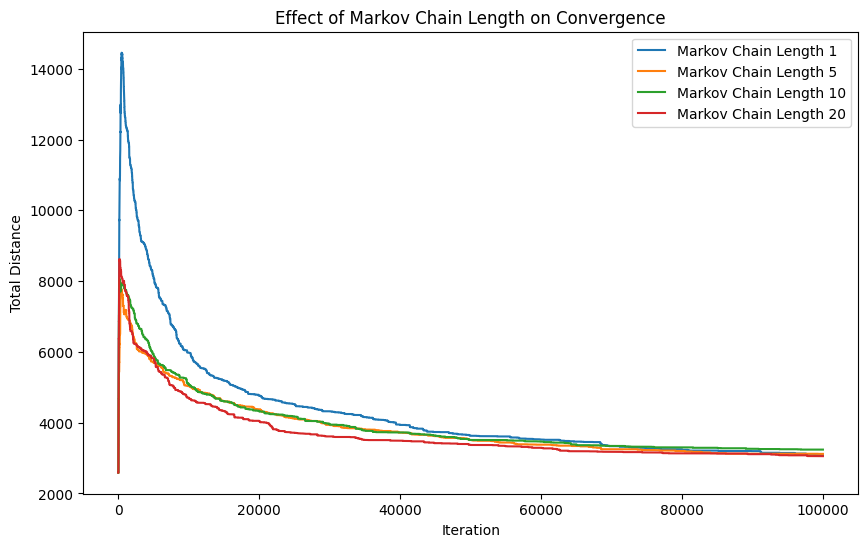

Convergence speed for each Markov Chain length: {1: 0, 5: 0, 10: 0, 20: 0}
Best Markov Chain length for fastest convergence: 1


{1: [2586.769647563161,
  2586.769647563161,
  2586.769647563161,
  2586.769647563161,
  2776.5341490829005,
  2776.5341490829005,
  2776.5341490829005,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  3133.3260997679663,
  3222.216725127424,
  3286.216725127424,
  3286.216725127424,
  3310.087633223764,
  3310.087633223764,
  3310.087633223764,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3565.9192283351995,
  3565.9192283351995,
  4056.8992159856994,
  4056.8992159856994,
  4056.8992159856994,
  4233.75849204922,
  4233.75849204922,
  4239.466016381078,
  4413.241645361236,
  4427.604441088554,
  4602.434208158579,
  4602.434208158579,
  4602.434208158579,
  4666.571544090756,
  4925.366827288421,
  4998.262424299255,
  4998.262424299255,
  4998.262424299255,
  5174.927937559933,
  5174.927937559933,
  5174.927937559933,
  5252.552885048393,
  5555.3933959021,


In [26]:
def markov_chain_effect(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths):
    results = {}
    convergence_speed = {}

    for length in markov_lengths:
        _, _, distances = stochastic_annealing_2opt(
            coordinates, initial_route, cooling_rate, number_of_iterations
        )
        results[length] = distances

        # Determine convergence speed
        target_distance = np.min(distances) * 1.05  # Target set to 105% of the best found
        for i, dist in enumerate(distances):
            if dist <= target_distance:
                convergence_speed[length] = i
                break

    # Plotting the distances
    plt.figure(figsize=(10, 6))
    for length, distances in results.items():
        plt.plot(distances, label=f'Markov Chain Length {length}')

    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('Effect of Markov Chain Length on Convergence')
    plt.legend()
    plt.show()

    # Comparing convergence speed
    print("Convergence speed for each Markov Chain length:", convergence_speed)

    # Identifying the best length
    best_length = min(convergence_speed, key=convergence_speed.get)
    print("Best Markov Chain length for fastest convergence:", best_length)

    return results

# Example usage:
coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

# Experiment Parameters
cooling_rate = 0.995
number_of_iterations = 100000  # Total number of iterations
markov_lengths = [1, 5, 10, 20]  # Example Markov Chain lengths

# Conduct the experiment
markov_chain_effect(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths)

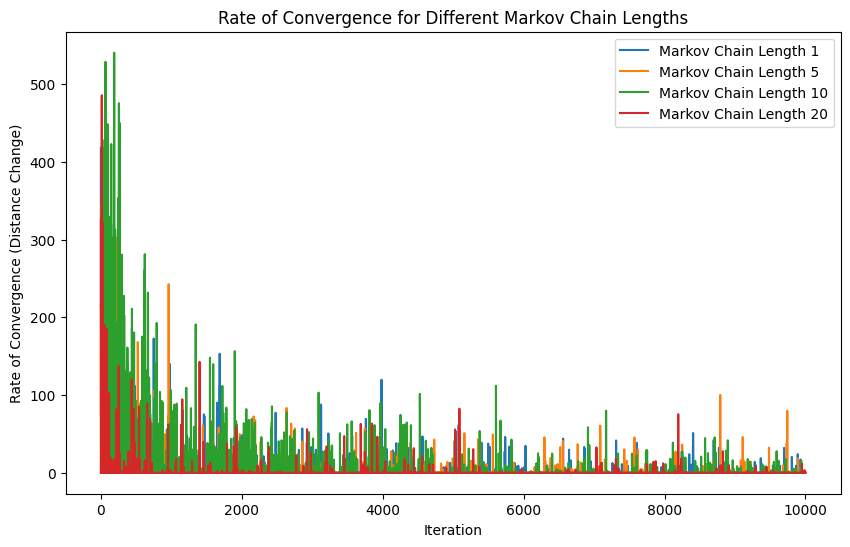

{1: [2586.769647563161,
  2797.5813494249264,
  3216.228518506876,
  3216.228518506876,
  3273.2133635118166,
  3273.2133635118166,
  3337.752738080139,
  3428.1262845699302,
  3697.848395835263,
  3697.848395835263,
  3697.848395835263,
  3846.3296862296643,
  3846.3296862296643,
  3846.3296862296643,
  4045.06973206862,
  4045.06973206862,
  4045.06973206862,
  4045.06973206862,
  4180.859059756702,
  4180.859059756702,
  4395.9779730050295,
  4395.9779730050295,
  4527.799689838393,
  4527.799689838393,
  4830.755458962252,
  4949.234433434156,
  4949.234433434156,
  5058.5057176872615,
  5058.5057176872615,
  5257.752277305636,
  5620.5914439496455,
  5713.356850124388,
  5713.356850124388,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# ... [Include the definitions of all your existing functions here] ...

def markov_convergence_rates(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths):
    results = {}
    convergence_rates = {}

    for length in markov_lengths:
        # Run the simulated annealing with the given Markov Chain length
        _, _, distances = stochastic_annealing_2opt(
            coordinates, initial_route, cooling_rate, number_of_iterations
        )
        results[length] = distances

        # Calculate the rate of convergence
        convergence_rates[length] = np.diff(distances)  # np.diff() calculates the change between each pair of adjacent elements

    # Plotting the rate of convergence
    plt.figure(figsize=(10, 6))
    for length, rates in convergence_rates.items():
        plt.plot(np.abs(rates), label=f'Markov Chain Length {length}')

    plt.xlabel('Iteration')
    plt.ylabel('Rate of Convergence (Distance Change)')
    plt.title('Rate of Convergence for Different Markov Chain Lengths')
    plt.legend()
    plt.show()

    return results

# Example usage:
coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

# Experiment Parameters
cooling_rate = 0.995
number_of_iterations = 10000  # Total number of iterations
markov_lengths = [1, 5, 10, 20]  # Example Markov Chain lengths

# Conduct the experiment
markov_convergence_rates(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths)
